In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
loan_df = pd.read_csv("Loan_Default.csv")

loan_df.head()

#hello

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Loan_To_Value_Ratio,Region,Security_Type,Status,debt_to_income_ratio
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
loan_df1 = loan_df.describe()




In [7]:
loan_df2 = loan_df.groupby("Credit_Score", as_index=False).mean()
loan_df2

,Credit_Score,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Loan_To_Value_Ratio,Status,debt_to_income_ratio
0,500,101677.803922,2019.0,316051.820728,4.018691,0.409251,3371.573293,334.588235,483968.253968,6780.887574,72.022276,0.282913,39.030405
1,501,100366.218487,2019.0,324819.327731,4.113822,0.521643,3110.354160,335.798319,463590.062112,6625.820433,74.650849,0.280112,37.857639
2,502,99867.225434,2019.0,323985.549133,4.073479,0.445933,3020.502421,341.861272,510770.700637,6615.789474,71.536367,0.239884,38.240550
3,503,100480.101828,2019.0,335272.845953,4.044441,0.475106,3460.761510,332.365535,490193.732194,7436.000000,72.730580,0.206266,37.597561
4,504,99443.918367,2019.0,320938.775510,4.069933,0.451830,3096.572062,336.673469,487521.126761,6714.545455,72.289335,0.242347,36.926829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,896,96890.938619,2019.0,340796.675192,4.032247,0.470630,3372.593979,333.667519,526296.089385,7468.702703,72.181899,0.242967,38.086053
397,897,101467.650131,2019.0,333836.814621,4.008596,0.437119,3379.223649,328.073107,490611.275964,6411.428571,73.303909,0.237598,37.874214
398,898,103106.575676,2019.0,323635.135135,4.049113,0.437682,3272.655884,341.383784,505619.047619,7055.384615,72.543366,0.237838,38.041009
399,899,97984.312500,2019.0,324596.590909,4.013032,0.434812,3301.268996,331.840909,496190.789474,6679.819820,71.941627,0.292614,38.740351


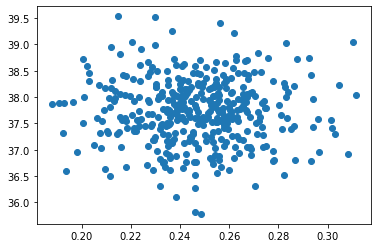

In [8]:
x = loan_df2["Status"]
y = loan_df2["debt_to_income_ratio"]

plt.scatter(x,y)
plt.show()

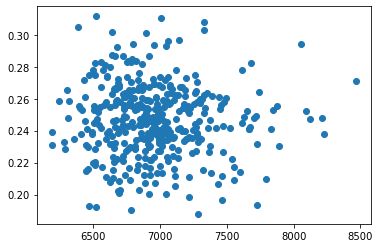

In [9]:
x = loan_df2["income"]
y = loan_df2["Status"]

plt.scatter(x,y)
plt.show()

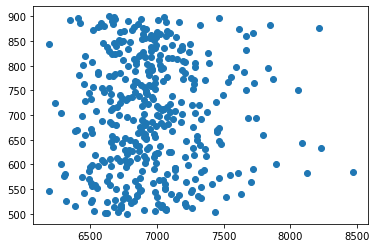

In [10]:
x = loan_df2["income"]
y = loan_df2["Credit_Score"]

plt.scatter(x,y)
plt.show()

## Two values for target column before get_dummies

In [36]:
loan_df["Status"].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

## Drop na

In [13]:
clean_loan_df = loan_df.dropna()

clean_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98187 entries, 2 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         98187 non-null  int64  
 1   year                       98187 non-null  int64  
 2   loan_limit                 98187 non-null  object 
 3   Gender                     98187 non-null  object 
 4   approv_in_adv              98187 non-null  object 
 5   loan_type                  98187 non-null  object 
 6   loan_purpose               98187 non-null  object 
 7   Credit_Worthiness          98187 non-null  object 
 8   open_credit                98187 non-null  object 
 9   business_or_commercial     98187 non-null  object 
 10  loan_amount                98187 non-null  int64  
 11  rate_of_interest           98187 non-null  float64
 12  Interest_rate_spread       98187 non-null  float64
 13  Upfront_charges            98187 non-null  fl

In [32]:
numeric_loan_df1 = pd.get_dummies(clean_loan_df, columns=["loan_limit", 
                                                          "Gender",
                                                            "approv_in_adv",             
                                                            "loan_type",                  
                                                            "loan_purpose",               
                                                            "Credit_Worthiness",          
                                                            "open_credit",                 
                                                            "business_or_commercial",
                                                             "Neg_ammortization",          
                                                             "interest_only",            
                                                             "lump_sum_payment",
                                                              "construction_type",          
                                                              "occupancy_type",
                                                              "Secured_by",                 
                                                              "total_units",
                                                              "credit_type",
                                                              "co-applicant_credit_type",    
                                                              "age",                        
                                                              "submission_of_application", 
                                                              "Region",                      
                                                              "Security_Type",
                                                          ])


numeric_loan_df1

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,...,age_65-74,age_<25,age_>74,submission_of_application_not_inst,submission_of_application_to_inst,Region_North,Region_North-East,Region_central,Region_south,Security_Type_direct
2,24892,2019,406500,4.560,0.2000,595.00,360.0,508000.0,9480.0,834,...,0,0,0,0,1,0,0,0,1,1
4,24894,2019,696500,4.000,0.3042,0.00,360.0,758000.0,10440.0,602,...,0,0,0,1,0,1,0,0,0,1
5,24895,2019,706500,3.990,0.1523,370.00,360.0,1008000.0,10080.0,864,...,0,0,0,1,0,1,0,0,0,1
6,24896,2019,346500,4.500,0.9998,5120.00,360.0,438000.0,5040.0,860,...,0,0,0,0,1,1,0,0,0,1
8,24898,2019,376500,4.875,0.7395,1150.00,360.0,478000.0,5580.0,580,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,436500,3.125,0.2571,9960.00,180.0,608000.0,7860.0,659,...,0,0,0,0,1,0,0,0,1,1
148666,173556,2019,586500,5.190,0.8544,0.00,360.0,788000.0,7140.0,569,...,0,0,0,1,0,0,0,0,1,1
148667,173557,2019,446500,3.125,0.0816,1226.64,180.0,728000.0,6900.0,702,...,0,0,0,1,0,1,0,0,0,1
148668,173558,2019,196500,3.500,0.5824,4323.33,180.0,278000.0,7140.0,737,...,0,0,0,0,1,1,0,0,0,1


## one_hot_encoding

In [28]:
# umeric_loan_df = pd.get_dummies(numeric_loan_df1)n

#numeric_loan_df = clean_loan_df.apply(pd.to_numeric)

## One Value after get_dummies

In [35]:
numeric_loan_df1["Status"].value_counts()

0    98187
Name: Status, dtype: int64

In [39]:
numeric_loan_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98187 entries, 2 to 148669
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  98187 non-null  int64  
 1   year                                98187 non-null  int64  
 2   loan_amount                         98187 non-null  int64  
 3   rate_of_interest                    98187 non-null  float64
 4   Interest_rate_spread                98187 non-null  float64
 5   Upfront_charges                     98187 non-null  float64
 6   term                                98187 non-null  float64
 7   property_value                      98187 non-null  float64
 8   income                              98187 non-null  float64
 9   Credit_Score                        98187 non-null  int64  
 10  Loan_To_Value_Ratio                 98187 non-null  float64
 11  Status                              9818

In [13]:
for (columnName, columnData) in numeric_loan_df.iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.nunique)



Colunm Name :  ID
Column Contents :  <bound method IndexOpsMixin.nunique of 2          24892
4          24894
5          24895
6          24896
8          24898
           ...  
148665    173555
148666    173556
148667    173557
148668    173558
148669    173559
Name: ID, Length: 98187, dtype: int64>
Colunm Name :  year
Column Contents :  <bound method IndexOpsMixin.nunique of 2         2019
4         2019
5         2019
6         2019
8         2019
          ... 
148665    2019
148666    2019
148667    2019
148668    2019
148669    2019
Name: year, Length: 98187, dtype: int64>
Colunm Name :  loan_amount
Column Contents :  <bound method IndexOpsMixin.nunique of 2         406500
4         696500
5         706500
6         346500
8         376500
           ...  
148665    436500
148666    586500
148667    446500
148668    196500
148669    406500
Name: loan_amount, Length: 98187, dtype: int64>
Colunm Name :  rate_of_interest
Column Contents :  <bound method IndexOpsMixin.nunique of 2   

In [30]:
# from sklearn.model_selection import train_test_split
# # X = train_df
# X = loan_df.drop(["target_high_risk","target_low_risk"], axis=1)

# y = loan_df["target_high_risk"]


# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()
# classifier

# classifier.fit(X_train,y_train)

# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [21]:
from sklearn.model_selection import train_test_split
# X = train_df
X = numeric_loan_df1.drop(["Status","Credit_Worthiness_l1","Credit_Worthiness_l2"], axis=1)

y = numeric_loan_df1["Status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)

reg = Lasso(max_iter=1000).fit(X_train_scaled, y_train)

#random forest
clf.fit(X_train_scaled, y_train)

# clf = RandomForestClassifier(random_state=42, n_estimators=50).fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')





# classifier.fit(X_train_scaled,y_train)

# print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Score: 1.0
Testing Score: 1.0


/Users/andrealynnbaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


In [22]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)

reg = Lasso(max_iter=1000).fit(X_train_scaled, y_train)

#random forest
clf.fit(X_train_scaled, y_train)

# clf = RandomForestClassifier(random_state=42, n_estimators=50).fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


/Users/andrealynnbaker/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


Training Score: 1.0
Testing Score: 1.0


In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train_scaled,y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [15]:
loan_df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'Loan_To_Value_Ratio', 'Region',
       'Security_Type', 'Status', 'debt_to_income_ratio'],
      dtype='object')

In [16]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

<AxesSubplot:>

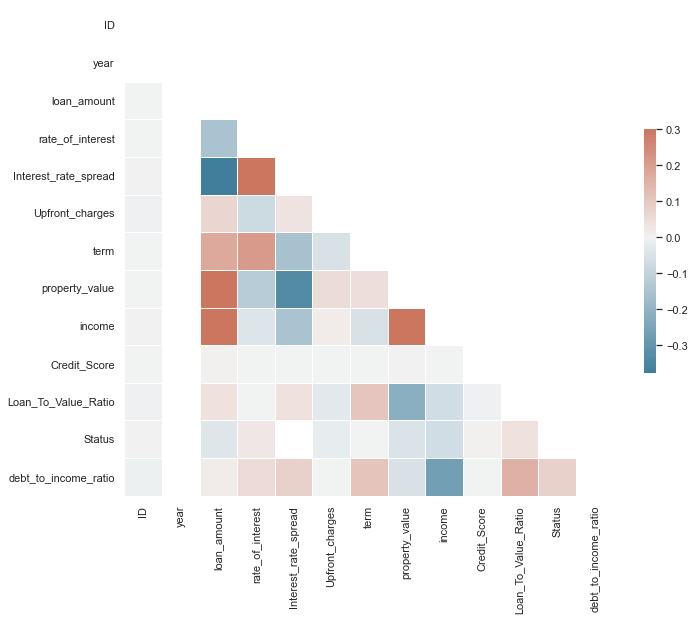

In [17]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns


sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = loan_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

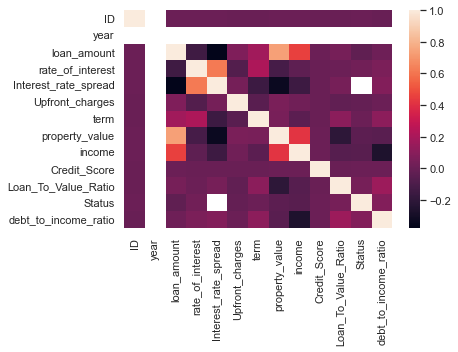

In [18]:
sns.heatmap(loan_df.corr());